<a id='7'></a> 
# Описание проекта "Разведывательный анализ данных".

## Цель проекта.

Целью проекта является проведение разведывательного анализа данных предложенного набора данных для его подготовки к обучению и тестированию ML-модели.

## Задачи проекта.

Для достижения поставленной цели необходимым видится решение следующих задач:

<a href='#1'>1. Первичная обработка данных.

<a href='#2'>2. Оценка распределения значений для количественных признаков, поиск и устранение аномальных значений.

<a href='#3'>3. Оценка уникальных значения для категориальных переменных.

<a href='#4'>4. Преобразование данных.

<a href='#5'>5. Корреляционный анализ количественных признаков.

<a href='#6'>6. Отбор признаков.

<a id='1'></a> 
## Этап 1. Первичная обработка данных.

Для начала импорируем необходимые библиотеки.

In [1]:
import pandas as pd
pd.options.display.max_columns = 99
pd.options.display.max_rows = 99
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

Определим необходимые для работы функции.

In [2]:
def df_info(df):
    print('Первые 10 строк набора данных')
    display(df.head(10))
    print()
    print('Информация о наборе данных:')
    print(df.info())
    print()
    print('Размер набор данных: {} признаков, {} объектов'.format(
        df.shape[1], df.shape[0]))
    print('Дубликаты:', df.duplicated().sum())
    print('Пропуски:')
    display(df.isna().sum())
    for i in df.columns:
        print(df[i].value_counts())


def numeric_distribution_viz(feature):
    fig, axes = plt.subplots(1, 2, figsize=(20, 5))
    df.plot(y=feature, kind='kde', ax=axes[0], title=(
        'Распределение значений признака ' + str(feature)))
    axes[0].set_xlabel('Единица измерения признака')
    axes[0].set_ylabel('Плотность распределения')

    df[str(feature)].value_counts().sort_index().plot(kind='bar', ax=axes[1],
                                                      title=('Распределение значений признака ' + str(feature)))
    axes[1].set_xlabel('Единица измерения признака')
    axes[1].set_ylabel('Плотность распределения')


def boxplot_viz(feature):
    df[feature].plot(
        kind='box', title='График boxplot для признака ' + str(feature))
    plt.ylabel('Значения признака ' + str(feature))
    plt.show()


def categorical_distribution_viz(feature):
    df[feature].value_counts().sort_index().plot(
        kind='bar', title='Распределение уникальных значений признака ' + str(feature))
    plt.xlabel('Уникальные значения признака')
    plt.ylabel('Количество значений уникального признака')
    plt.show()


def get_stat_dif(feature):
    cols = df.loc[:, feature].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, feature] == comb[0], 'score'],
                     df.loc[df.loc[:, feature] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):
            return True

Считаем набор данных.

In [3]:
df = pd.read_csv('stud_math.xls')

Для проведения минимального EDA применим небольшую функцию, которая, принимая на вход датафрейм, выведет первые его 10 строк, общую информацию, размер датафрейма, наличие в нём дубликатов и пропущенных значений, а также уникальные значения для каждого признака.

In [4]:
df_info(df)

Первые 10 строк набора данных


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0



Информация о наборе данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup  

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

GP    349
MS     46
Name: school, dtype: int64
F    208
M    187
Name: sex, dtype: int64
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
U    295
R     83
Name: address, dtype: int64
GT3    261
LE3    107
Name: famsize, dtype: int64
T    314
A     36
Name: Pstatus, dtype: int64
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64
2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64
other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64
other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64
course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64
mother    250
father     86
other      28
Name: guardian, dtype: int64
1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64
2.0    194
1.0    103
3.0     64


Для начала дадим расшифровку имеющимся признакам.

1. school — аббревиатура школы, в которой учится ученик;

2. sex — пол ученика ('F' - женский, 'M' - мужской);

3. age — возраст ученика (от 15 до 22);

4. address — тип адреса ученика ('U' - городской, 'R' - за городом);

5. famsize — размер семьи('LE3' <= 3, 'GT3' >3);

6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно);

7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее);

8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее);

9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое);

10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое);

11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое);

12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое);

13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.);

14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов);

15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0);

16. schoolsup — дополнительная образовательная поддержка (yes или no);

17. famsup — семейная образовательная поддержка (yes или no);

18. paid — дополнительные платные занятия по математике (yes или no);

19. activities — дополнительные внеучебные занятия (yes или no);

20. nursery — посещал детский сад (yes или no);

21. higher — хочет получить высшее образование (yes или no);

22. internet — наличие интернета дома (yes или no);

23. romantic — в романтических отношениях (yes или no);

24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо);

25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого);

26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много);

27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо);

28. absences — количество пропущенных занятий;

29. score — баллы по госэкзамену по математике.

Также имеется признак **studytime, granular**, сущность которого нам неизвестна.
Вместе с тем можно предположить, что этот признак является иной формой представления признака **studytime**, поэтому есть смысл проверить уровень корреляции этого признака с признаком **studytime**, а также с целевым признаком **score**.

In [5]:
df[['studytime, granular', 'studytime', 'score']].corr()

,"studytime, granular",studytime,score
"studytime, granular",1.000000,-1.000000,-0.115741
studytime,-1.000000,1.000000,0.115741
score,-0.115741,0.115741,1.000000


Признаки **studytime, granular** и **studytime** слабо коррелируют с целевым признаком по отдельности, однако между ними наблюдается абсолютная положительная корреляция. Таким образом, признак **studytime, granular** будем интерпретировать как некоторое иное, на текущий момент - неизвестное, представление признака **studytime**. Однозначно сказать о том, стоит ли удалять его, можно будет сказать на этапе моделирования, попробовав обучить модель с признаком и без признака. 

В целом, имеющийся набор данных содержит 30 признаков и 395 наблюдений. Из 30 признаков:

- 17 категориальных признаков;

- 13 численных признаков. 

Однако некоторые количественные признаки представляют собой закодированные категориальные признаки, которые также стоит оценивать как категориальные. В их числе: Medu, Fedu, traveltime, studytime, studytime, granular, failures, famrel, freetime, goout, health.

Таким образом, имеем:

- 27 категориальных признаков;

- 3 численных признака. 

Дубликатов в наборе данных нет, однако практически в каждом признаке так или иначе присутствуют пропущенные значения.

Для начала сформируем перечень количественных и категориальных полей.

In [6]:
numeric_features = []
cat_features = []

for i in df.columns:
    if str(df[str(i)].dtype) == 'object' or i in ['Medu', 'Fedu', 'traveltime', 'studytime', 'studytime, granular',
                                                  'failures', 'famrel', 'freetime', 'goout', 'health']:
        cat_features.append(i)
    else:
        numeric_features.append(i)

Прибегнем к простому алгоритму замены пропущенных значений:

- если признак количественный, то пропущенные значения будем заменять медианным значением;
- если признак категориальный, то пропущенные значения будем заменять модой.

In [7]:
for i in numeric_features:
    df[numeric_features] = df[numeric_features].fillna(
        df[numeric_features].median())

for i in cat_features:
    mode = df[i].mode()[0]
    df[i] = df[i].fillna(mode)

Замена пропущенных значений прошла успешно. Посмотрим на количество пропусков после замены.

In [8]:
df.isna().sum()

school                 0
sex                    0
age                    0
address                0
famsize                0
Pstatus                0
Medu                   0
Fedu                   0
Mjob                   0
Fjob                   0
reason                 0
guardian               0
traveltime             0
studytime              0
failures               0
schoolsup              0
famsup                 0
paid                   0
activities             0
nursery                0
studytime, granular    0
higher                 0
internet               0
romantic               0
famrel                 0
freetime               0
goout                  0
health                 0
absences               0
score                  0
dtype: int64

Видим, что пропущенные значения были успешно обработаны. Однако замена на моду/медиану - грубый подход. Из более интересных методов можно было бы использовать замену по словарю или с помощью sklearn.impute.KNNImputer.

## Вывод по этапу 1.

На первом этапе были импортированы необходимые библиотеки, а также считан и проанализирован предоставленный набор данных. Было определено, что имеющийся набор данных содержит 30 признаков и 395 наблюдений. Из 30 признаков:

- 17 категориальных признаков;

- 13 численных признаков. 

Однако некоторые количественные признаки представляют собой закодированные категориальные признаки, которые также стоит оценивать как категориальные. В их числе: Medu, Fedu, traveltime, studytime, studytime, granular, failures, famrel, freetime, goout, health.

Таким образом, имеем:

- 27 категориальных признаков;

- 3 численных признака. 

Дубликатов в наборе данных нет, однако практически в каждом признаке так или иначе присутствуют пропущенные значения, которые были обработаны следующим образом:

- пропущенные значения в количественных признаках были заменены на медианное значение этого признака;

- пропущенные значения в категориальных признаках были заменены на моду этого признака.

Помимо прочего, было отмечено сходство признаков studytime, granular и studytime, имеющих абсолютную положительную корреляцию, однако было принято решение не удалять один из них на текущем этапе работы с данными.

<a href='#7'> К оглавлению

<a id='2'></a> 
## Этап 2. Оценка распределения значений для количественных признаков, поиск и устранение аномальных значений.

Далее визуализируем распределение значений в исследуемых признаках. Начнём с количественных признаков. Так как количественные признаки - непрерывная величина, то обычная гистограмма распределения здесь не подойдёт. Вместо этого можно использовать график плотности распределения. 

Для автоматизации процесса код для визуализации был обёрнут в функцию, которую будем использовать в цикле. Применим функцию для количественных переменных.

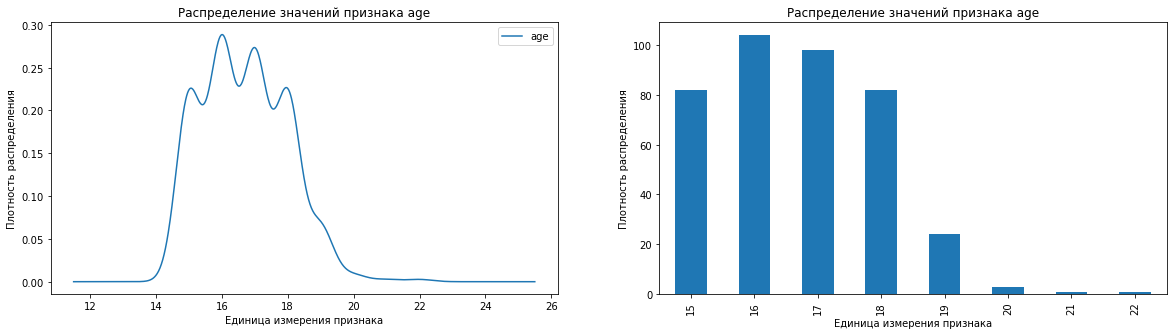

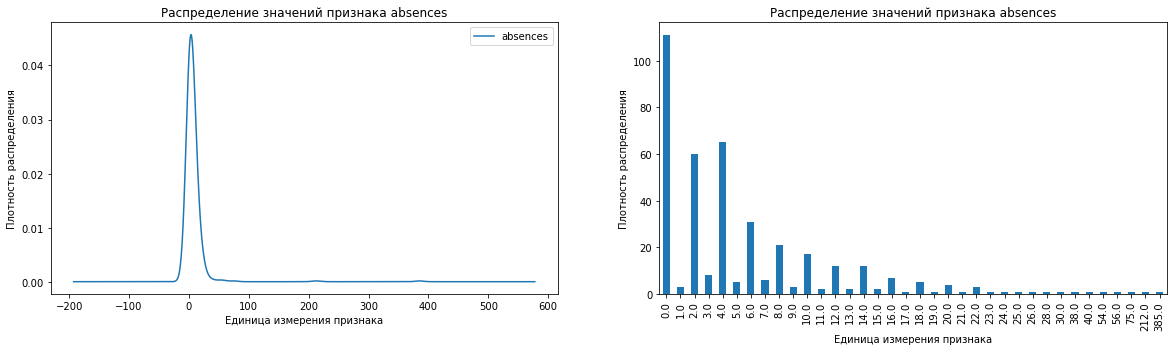

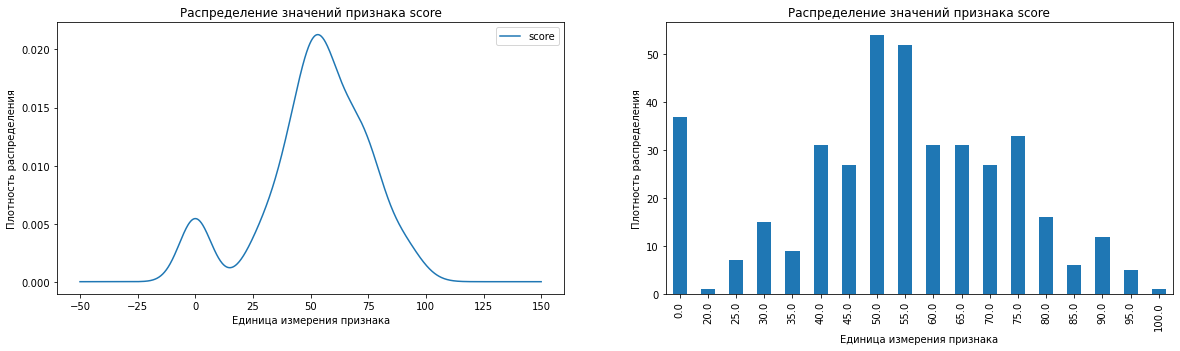

In [9]:
for i in numeric_features:
    numeric_distribution_viz(i)

Распределение признака **age** напоминает нормальное, однако данные немного скошены вправо: это связано с наличием в наборе данных студентов, чей возраст - от 20 и старше. Тем не менее скос данных вправо не настолько велик, чтобы среднее значения распределения стало выше медианного значения. В этом несложно убедиться.

In [10]:
print('Среднее значения признака age: {:.2f}, медианное значение признака age: {:.2f}'.format(df.age.mean(),
                                                                                              df.age.median()))

Среднее значения признака age: 16.70, медианное значение признака age: 17.00


Распределение признака **absences** также скошено вправо: подавляющее большинство учеников занятия не пропускают. Также в данных видна интересная закономерность: более высокая частота встречаемости характерна чётному количество пропущенных занятий, чем нечётному. Кроме того, есть 2 ученика, пропустивших более 200 занятий: 212 и 385 пропусков соответственно.

Распределение признака **score** в большей степени напоминает нормальное, чем распределеие остальных количественных признаков, с той лишь разницей, что данное распределение является бимодальным: первая мода - значение score на уровне 50, вторая мода - значение score на уровне 0.

Проверим количественные признаки на наличие аномальных значений. Для этого для каждого количественного признака построим boxplot. Реализацию отрисовки графика реализована в виде функции, которая прогоняется через цикл.

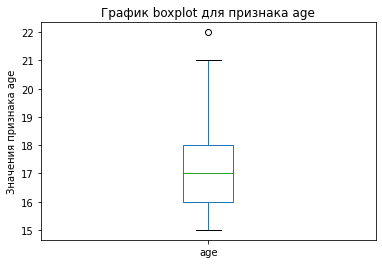

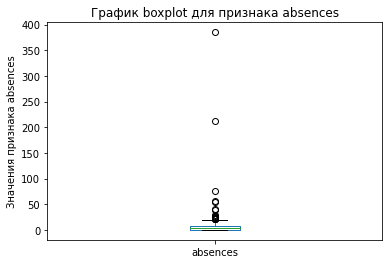

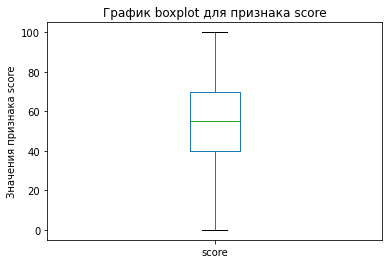

In [11]:
for i in numeric_features:
    boxplot_viz(i)

Как видим, признак **score**  выбросов не содержит. Признак **age** содержит только 1 выброс: им считается студент старше 21 года. 

Напротив, признак **absences** изобилует выбросами в правом хвосте данных. Оно и неудивительно, учитывая, что в наборе данных есть студенты с количеством пропущенных занятий за 200.

Избавимся от выбросов в количественных признаках - для этого избавимся от значений, лежащих выше или ниже полура межквартильных размахов.

In [12]:
for i in numeric_features:
    df = df[(df[i] >= df[i].quantile(0.25) - 1.5 * (df[i].quantile(0.75) - df[i].quantile(0.25)))
            & (df[i] <= df[i].quantile(0.75) + 1.5 * (df[i].quantile(0.75) - df[i].quantile(0.25)))]

Количественные признаки успешно были очищены от выбросов.

## Вывод по этапу 2.

На данном этапе было проанализировано распределение количественных признаков:

- распределение признака age напоминает нормальное, однако данные немного скошены вправо: это связано с наличием в наборе данных студентов, чей возраст - от 20 и старше; тем не менее скос данных вправо не настолько велик, чтобы среднее значения распределения стало выше медианного значения;

- распределение признака absences также скошено вправо: подавляющее большинство учеников занятия не пропускают, также в данных видна интересная закономерность: более высокая частота встречаемости характерна чётному количество пропущенных занятий, чем нечётному; кроме того, есть 2 ученика, пропустивших более 200 занятий: 212 и 385 пропусков соответственно;

- распределение признака score в большей степени напоминает нормальное, чем распределеие остальных количественных признаков, с той лишь разницей, что данное распределение является бимодальным: первая мода - значение score на уровне 50, вторая мода - значение score на уровне 0.

Кроме того, были устранены выбросы в признаках age и absences путём ограничения значений этих признаков в диапазоне 1 и 3 квартиля минус и плюс полтора межквартильных размаха соответственно.

<a href='#7'> К оглавлению

<a id='3'></a> 
## Этап 3. Оценка уникальных значения для категориальных переменных.

Далее визуализируем уникальные значения категориальных переменных. Для этого используем в цикле подготовленную ранее функцию.

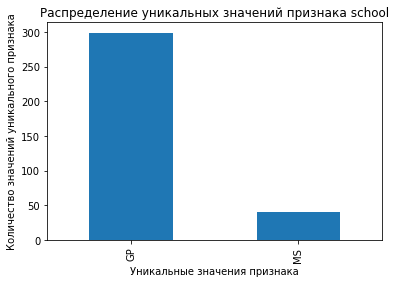

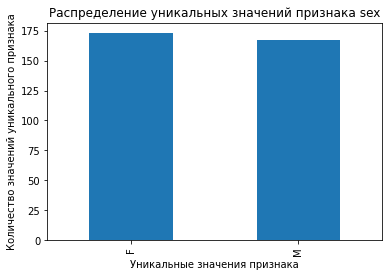

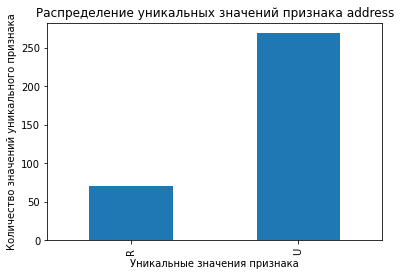

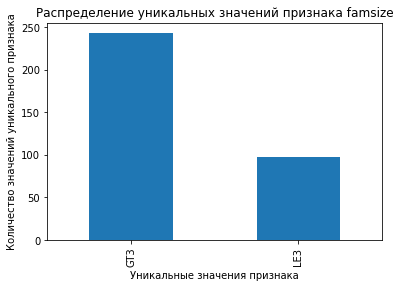

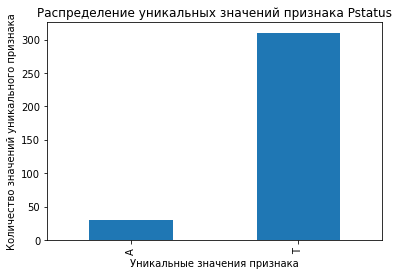

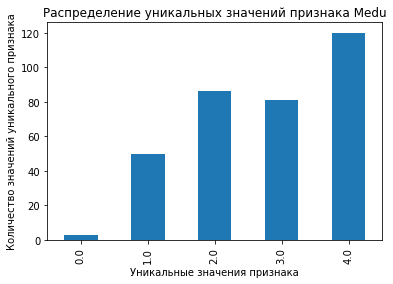

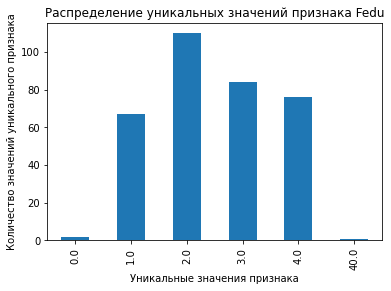

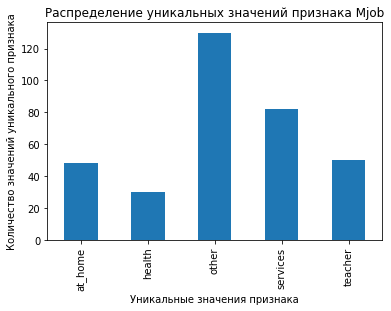

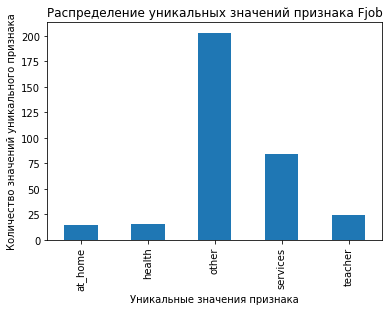

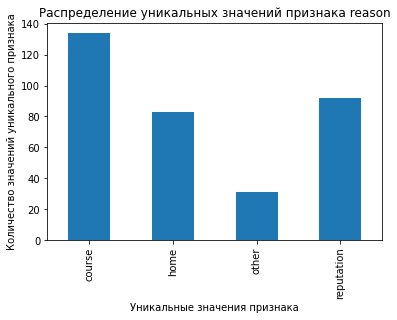

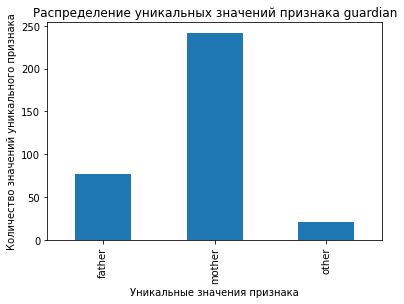

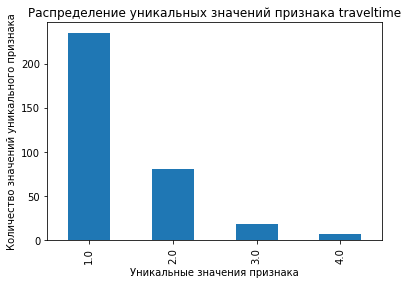

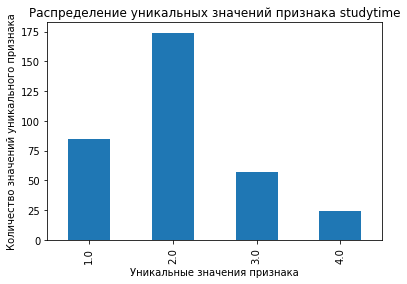

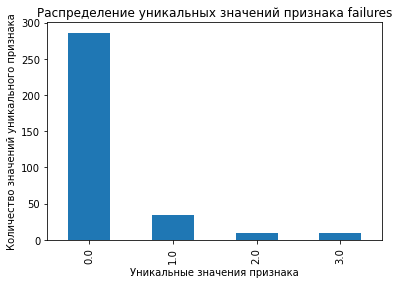

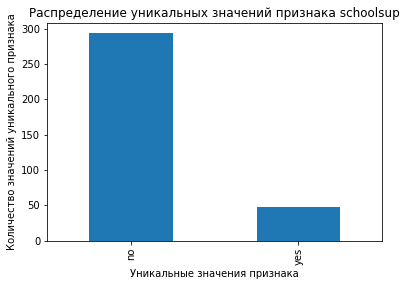

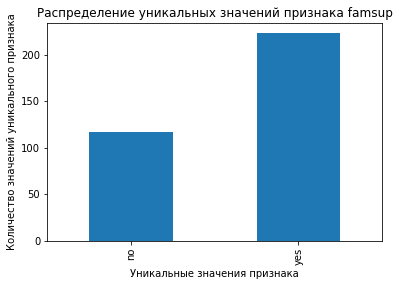

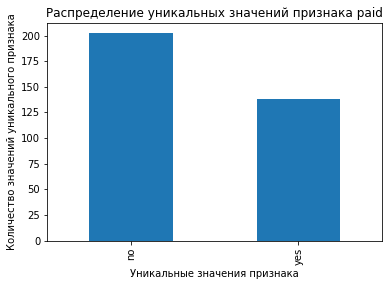

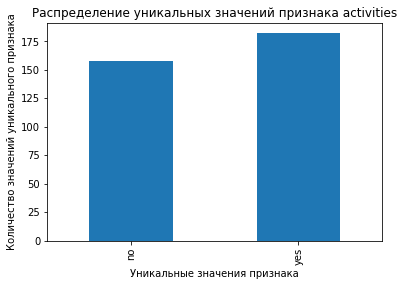

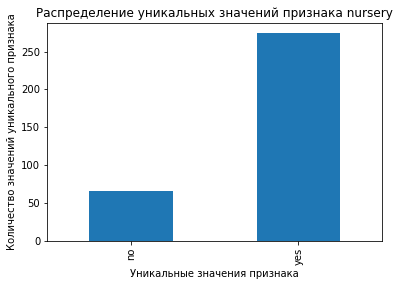

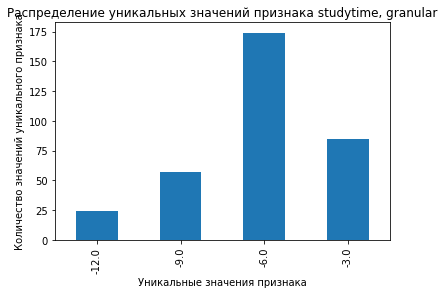

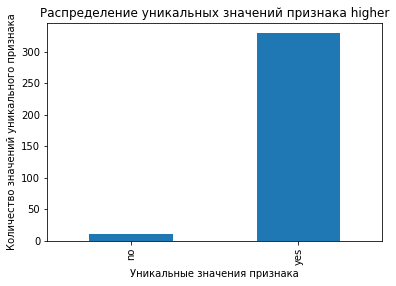

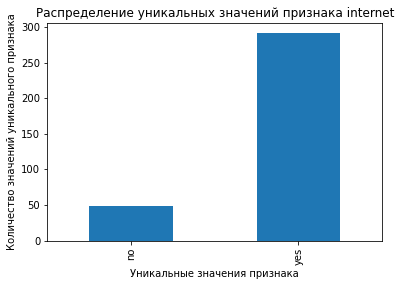

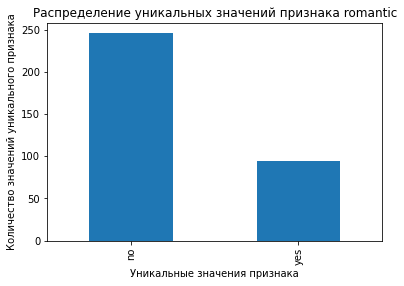

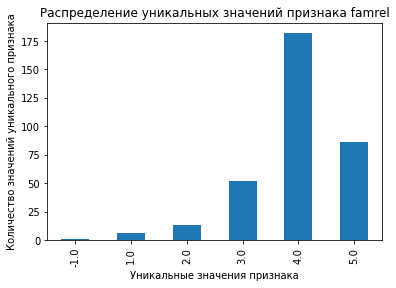

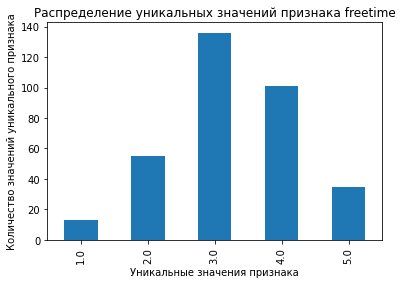

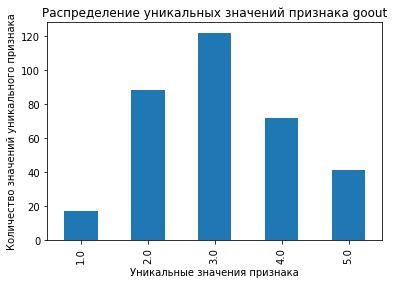

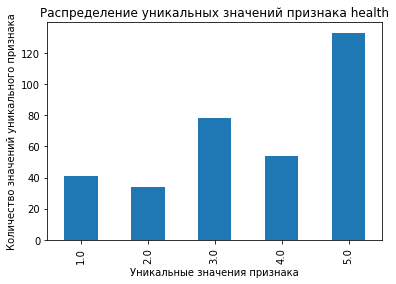

In [13]:
for i in cat_features:
    categorical_distribution_viz(i)

Из распределения признака **school** мы видим, что в наборе данных представлены студенты из двух школ: GP и MS, при этом преобладающее большинство студентов (около 88%) обучаются в GP.

По признаку **sex** студенты распределены практически равномерно с небольшим преобладанием студентов-девушек: 50.88% против 49.12% соответственно. 

По распределению признака **address** видно, что основная масса студентов проживают в городской местности, и только их часть - порядка 21% - проживают за городом.

По распределению признака **famsize** видно, что в основном (71%) в семьях студентов более 3 человек.

Распределение признака **Pstatus** говорит о том, что в 9 из 10 семей студентов родители проживают вместе.

Из распределения признака **Medu** видно, что чаще всего матери студентов имеют либо высшее образование (около 35%), либо общее среднее образование (около 25%). Среднее специальное образование имеют 24% матерей, начальное - около 15%, и менее 1% матерей образования не имеют.

Немного другую ситуацию показывает распределение признака **Fedu**: почти треть - 32% - отцов студентов имеют среднее образование, около 24% получили среднее специальное образование, у 22% отцов есть высшее образование. Количество отцов с начальным образованием составляет около 19%, а количество отцов без образования вовсе незначительное - 0.5%. Также есть 1 наблюдение с аномальным значением 40, интерпретировать которое довольно сложно. Вероятно, от него лучше избавиться.

Из распределения признака **Mjob** видно, что чаще всего - около 38% - матери студентов заняты в других сферах, на втором месте - около 24% - заняты в сфере услуг, на долю матерей в сфере образования и матерей, работающих из дома, приходится по 14%. В сфере здравоохранения занято около 9% матерей.

Примерно схожее распределение демонстрирует признак **Fjob**: самая популярная сфера работы отцов студентов - иные сферы: на них приходится порядка 60% от всего количества отцов. На втором месте - около 25% - сфера услуг. Далее идёт сфера образования - около 7%. В сфере здравоохранения занято около 4% отцов, из дома работают столько же - около 4%.

Согласно распределению признака **reason**, чаще всего - около 39% всех студентов - выбрали школу благодаря образовательной программе. Престиж школы важен для 27% студентов, около 24% студентов привлекла близость к дому. Наименее важная группа причин - другие причины: они важны для 9% студентов.

Распределение признака **guardian** говорит о том, что чаще всего - в 71% случаев - опекуном студента является мать, отец является опекуном в 23% случаев. В 6% случаев функции опекуна выполняет кто-то ещё.

Из распределения признака **traveltime** видно, что около 69% студентов проводят в пути менее 15 минут, что кажется довольно комфортным временем в пути. 24% студентов добираются до школы от 15 до 30 минут, от получаса до часа в дороге проводят около 5% студентов, ну а больше часа до школы добираются около 2% студентов.

Согласно признаку **studytime**, помимо основного обучения, немного больше половины студентов (около 51%) тратят на дополнительное обучение от 2 до 5 часов. Около часа дополнительно занимается 25% студентов. От 5 до 10 часов на дополнительное образование тратят 16% студентов, а более 10 часов дополнительно учатся только 7% студентов.

Около 84% студентов не терпят внеучебных неудач (признак **failures**).

Около 86% студентов не пользуются дополнительной образовательной поддержкой (признак **schoolsup**).

Зато семейной образовательной поддержкой пользуются около 66% студентов (признак **famsup**).

Примерно 59% студентов посещают дополнительные уроки математики (признак **paid**).

Около 54% студентов имеют дополнительные внеклассные активности (признак **activities**).

Примерно 81% студентов посещали детсад (признак **nursery**).

Почти все студенты (около 97%) стремятся получить высшее образование (признак **higher**).

Около 86% студентов имеют дома интернет.

Каждый 7 студент (около 72%) состоит в романтических отношениях.

В большей части семей (около 53%) семейные отношения получили наивысшую оценку (признак **famrel**). Также в наборе данных есть одно значение -1, которое проблематично интерпретировать - удалим его.

Очень много свободного времени (на 5 из 5) имеет около 30% студентов (признак **freetime**), около 40% имеют его чуть меньше (на 4 из 5).

Чаще всего (в 35% случаев) студенты проводят умеренное количество времени с друзьями (на 3 из 5) (признак **goout**).

Почти у 40% студентов со здоровьем полный порядок (на 5 из 5), но достаточно и тех (около 12%) , у кого со здоровьем очень плохо (на 1 из 5) (признак **health**).

Избавимся от выявленных аномальных значений.

In [14]:
df = df[(df['famrel'] != -1) & (df['Fedu'] != 40)]

## Вывод по этапу 3.

На третьем этапе было проанализировано распределение уникальных значений категориальных признаков. Из выводов можно отметить:

- в наборе данных представлены студенты из двух школ: GP и MS, при этом преобладающее большинство студентов (около 88%) обучаются в GP;

- по половому признаку студенты распределены практически равномерно с небольшим преобладанием студентов-девушек: 50.88% против 49.12% соответственно;

- основная масса студентов проживают в городской местности, и только их часть - порядка 21% - проживают за городом;

- в основном (71% случаев) в семьях студентов более 3 человек;

- в 9 из 10 семей студентов родители проживают вместе;

- чаще всего матери студентов имеют либо высшее образование (около 35%), либо общее среднее образование (около 25%);

- почти треть отцов студентов - 32% случаев - имеют среднее образование;

- чаще всего матери студенто - около 38% случаев - в заняты в других сферах;

- самая популярная сфера работы отцов студентов - иные сферы: на них приходится порядка 60% от всего количества отцов;

- чаще всего - около 39% всех студентов - выбрали школу благодаря образовательной программе;

- чаще всего - в 71% случаев - опекуном студента является мать, отец является опекуном в 23% случаев;

- около 69% студентов проводят в пути менее 15 минут;

- немного больше половины студентов (около 51%) тратят на дополнительное обучение от 2 до 5 часов;

- около 84% студентов не терпят внеучебных неудач;

- около 86% студентов не пользуются дополнительной образовательной поддержкой;

- семейной образовательной поддержкой пользуются около 66% студентов;

- примерно 59% студентов посещают дополнительные уроки математики;

- около 54% студентов имеют дополнительные внеклассные активности;

- примерно 81% студентов посещали детсад;

- почти все студенты (около 97%) стремятся получить высшее образование;

- около 86% студентов имеют дома интернет;

- каждый 7 студент (около 72%) состоит в романтических отношениях;

- в большей части семей (около 53%) семейные отношения получили наивысшую оценку;

- очень много свободного времени (на 5 из 5) имеет около 30% студентов, около 40% имеют его чуть меньше (на 4 из 5);

- чаще всего (в 35% случаев) студенты проводят умеренное количество времени с друзьями (на 3 из 5);

- почти у 40% студентов со здоровьем полный порядок (на 5 из 5), но достаточно и тех (около 12%) , у кого со здоровьем очень плохо (на 1 из 5).

Также были выявлены и удалены аномальные значения в признаках:

- famrel с аномальным значением -1;

- Fedu c аномальным значением 40.

<a href='#7'> К оглавлению

<a id='4'></a> 
## Этап 4. Преобразование данных.

Преобразование форматов данных на данном этапе не требуется, однако в зависимости от выбранного в будущем алгоритма предсказания оценок можно закодировать категориальные переменные.

<a href='#7'> К оглавлению

<a id='5'></a> 
## Этап 5. Корреляционный анализ количественных признаков.

Проведём корреляционный анализ количественных признаков с целевой переменной.

In [15]:
df[numeric_features].corr()

,age,absences,score
age,1.000000,0.179108,-0.122457
absences,0.179108,1.000000,-0.228745
score,-0.122457,-0.228745,1.000000


В нашем случае в наборе данных отсутствуют сильно скоррелированные переменные, поэтому по признаку корреляции исключать переменные из набора данных не будем.

## Вывод по этапу 5.

На пятом этапе был проведён корреляционный анализ количественных признаков и целевого признака. По его итогу было выяснено, что количественные признаки не имеют сильной корреляции с целевым признаком, эффект мультиколлинераности также не наблюдается, поэтому количественные признаки из набора данных не удалялись.

<a href='#7'> К оглавлению

<a id='6'></a> 
## Этап 6. Отбор признаков.

Теперь проведём отбор признаков по критерию их влияния на целевую переменную. Используем заранее написанную функцию **get_stat_dif**. В случае если призак оказывает статистически значимое влияние на целевую переменную, функция вернёт значение True. Далее в случае, если функция вернула значение True, запишем название признака в список  **stat_cat_features**.

In [16]:
stat_cat_features = []
for i in cat_features:
    if get_stat_dif(i) == True:
        stat_cat_features.append(i)
print('Удалось выяснить, что на целевую переменную оказывают влияние {} признаков, среди них:'.format(
    len(stat_cat_features)), end=' ')
for i in stat_cat_features:
    print(i, end=', ')

Удалось выяснить, что на целевую переменную оказывают влияние 11 признаков, среди них: sex, address, Medu, Fedu, Mjob, studytime, failures, schoolsup, studytime, granular, goout, health, 

Таким образом, для моделирования можно оставить количественные признаки и 11 категориальных признаков, оказывающих статистически значимое влияние на целевую переменную.

In [17]:
df = df[numeric_features + stat_cat_features]

Узнаем, сколко признаков осталось после отбора.

In [18]:
df.shape[1]

14

Нам удалось боее чем вдвое сократить размерность признакового пространства, что позволит быстрее обучать алгоритмы и - потенциально - получать более высокие значения метрик качества.

<a href='#7'> К оглавлению

# Итоговый вывод по проекту.

**Целью** проекта было проведение разведывательного анализа данных предложенного набора данных для его подготовки к обучению и тестированию ML-модели.

Для достижения цели проекта были поставлены следующие **задачи**: 

1. Первичная обработка данных.

2. Оценка распределения значений для количественных признаков, поиск и устранение аномальных значений.

3. Оценка уникальных значения для категориальных переменных.

4. Преобразование данных.

5. Корреляционный анализ количественных признаков.

6. Отбор признаков.

На первом этапе были импортированы необходимые библиотеки, а также считан и проанализирован предоставленный набор данных. Было определено, что имеющийся набор данных содержит 30 признаков и 395 наблюдений. Из 30 признаков:

- 17 категориальных признаков;

- 13 численных признаков. 

Однако некоторые количественные признаки представляют собой закодированные категориальные признаки, которые также стоит оценивать как категориальные. В их числе: Medu, Fedu, traveltime, studytime, studytime, granular, failures, famrel, freetime, goout, health.

Таким образом, имеем:

- 27 категориальных признаков;

- 3 численных признака. 

Дубликатов в наборе данных нет, однако практически в каждом признаке так или иначе присутствуют пропущенные значения, которые были обработаны следующим образом:

- пропущенные значения в количественных признаках были заменены на медианное значение этого признака;

- пропущенные значения в категориальных признаках были заменены на моду этого признака.

Помимо прочего, было отмечено сходство признаков studytime, granular и studytime, имеющих абсолютную положительную корреляцию, однако было принято решение не удалять один из них на текущем этапе работы с данными.

На втором этапе было проанализировано распределение количественных признаков:

- распределение признака age напоминает нормальное, однако данные немного скошены вправо: это связано с наличием в наборе данных студентов, чей возраст - от 20 и старше; тем не менее скос данных вправо не настолько велик, чтобы среднее значения распределения стало выше медианного значения;

- распределение признака absences также скошено вправо: подавляющее большинство учеников занятия не пропускают, также в данных видна интересная закономерность: более высокая частота встречаемости характерна чётному количество пропущенных занятий, чем нечётному; кроме того, есть 2 ученика, пропустивших более 200 занятий: 212 и 385 пропусков соответственно;

- распределение признака score в большей степени напоминает нормальное, чем распределеие остальных количественных признаков, с той лишь разницей, что данное распределение является бимодальным: первая мода - значение score на уровне 50, вторая мода - значение score на уровне 0.

Кроме того, были устранены выбросы в признаках age и absences путём ограничения значений этих признаков в диапазоне 1 и 3 квартиля минус и плюс полтора межквартильных размаха соответственно.

На третьем этапе было проанализировано распределение уникальных значений категориальных признаков. Из выводов можно отметить:

- в наборе данных представлены студенты из двух школ: GP и MS, при этом преобладающее большинство студентов (около 88%) обучаются в GP;

- по половому признаку студенты распределены практически равномерно с небольшим преобладанием студентов-девушек: 50.88% против 49.12% соответственно;

- основная масса студентов проживают в городской местности, и только их часть - порядка 21% - проживают за городом;

- в основном (71% случаев) в семьях студентов более 3 человек;

- в 9 из 10 семей студентов родители проживают вместе;

- чаще всего матери студентов имеют либо высшее образование (около 35%), либо общее среднее образование (около 25%);

- почти треть отцов студентов - 32% случаев - имеют среднее образование;

- чаще всего матери студенто - около 38% случаев - в заняты в других сферах;

- самая популярная сфера работы отцов студентов - иные сферы: на них приходится порядка 60% от всего количества отцов;

- чаще всего - около 39% всех студентов - выбрали школу благодаря образовательной программе;

- чаще всего - в 71% случаев - опекуном студента является мать, отец является опекуном в 23% случаев;

- около 69% студентов проводят в пути менее 15 минут;

- немного больше половины студентов (около 51%) тратят на дополнительное обучение от 2 до 5 часов;

- около 84% студентов не терпят внеучебных неудач;

- около 86% студентов не пользуются дополнительной образовательной поддержкой;

- семейной образовательной поддержкой пользуются около 66% студентов;

- примерно 59% студентов посещают дополнительные уроки математики;

- около 54% студентов имеют дополнительные внеклассные активности;

- примерно 81% студентов посещали детсад;

- почти все студенты (около 97%) стремятся получить высшее образование;

- около 86% студентов имеют дома интернет;

- каждый 7 студент (около 72%) состоит в романтических отношениях;

- в большей части семей (около 53%) семейные отношения получили наивысшую оценку;

- очень много свободного времени (на 5 из 5) имеет около 30% студентов, около 40% имеют его чуть меньше (на 4 из 5);

- чаще всего (в 35% случаев) студенты проводят умеренное количество времени с друзьями (на 3 из 5);

- почти у 40% студентов со здоровьем полный порядок (на 5 из 5), но достаточно и тех (около 12%) , у кого со здоровьем очень плохо (на 1 из 5).

Также были выявлены и удалены аномальные значения в признаках:

- famrel с аномальным значением -1;

- Fedu c аномальным значением 40.

Четвёртый этап был пропущен, так как преобразование типов данных не потребовалось для достижения цели проекта.

На пятом этапе был проведён корреляционный анализ количественных признаков и целевого признака. По его итогу было выяснено, что количественные признаки не имеют сильной корреляции с целевым признаком, эффект мультиколлинераности также не наблюдается, поэтому количественные признаки из набора данных не удалялись.

На шестом этапе по признаку оказания статистически значимого влияния на целевую переменную был произведён отбор категориальных переменных.  

В финальную версию набора данных, который будет использован для моделирования, попадут следующие признаки: age, absences, score, sex, address, Medu, Fedu, Mjob, studytime, failures, schoolsup, studytime, granular, goout, health.